In [1]:
import torch

In [2]:
t_c = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)
t_c, t_u

(tensor([ 0.5000, 14.0000, 15.0000, 28.0000, 11.0000,  8.0000,  3.0000, -4.0000,
          6.0000, 13.0000, 21.0000]),
 tensor([35.7000, 55.9000, 58.2000, 81.9000, 56.3000, 48.9000, 33.9000, 21.8000,
         48.4000, 60.4000, 68.4000]))

In [3]:
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

In [4]:
def model(t_u, w, b):
    return w * t_u + b

In [5]:
def dloss_fn(t_p, t_c):
    dsq_diffs = 2 * (t_p - t_c) / t_p.size(0) # 均值的导数
    return dsq_diffs

In [6]:
def dmodel_dw(t_u, w, b):
    return t_u

In [7]:
def dmodel_db(t_u, w, b):
    return 1.0

定义梯度函数

In [8]:
def grad_fn(t_u, t_c, t_p, w, b):
    dloss_dtp = dloss_fn(t_p, t_c)
    dloss_dw = dloss_dtp * dmodel_dw(t_u, w, b)
    dloss_db = dloss_dtp * dmodel_db(t_u, w, b)
    return torch.stack([dloss_dw.sum(), dloss_db.sum()])

In [16]:
def training_loop(n_epochs, learning_rate, params, t_u, t_c):
    for epoch in range(1, n_epochs + 1):
        w, b = params
        t_p = model(t_u, w, b) # 正向
        loss = loss_fn(t_p, t_c)
        grad = grad_fn(t_u, t_c, t_p, w, b) # 反向
        params = params - learning_rate * grad
        print('Epoch %d, Loss %f' % (epoch, float(loss)))
    return params

In [17]:
training_loop(n_epochs = 100, learning_rate = 1e-2, params = torch.tensor([1.0, 0.0]), t_u = t_u, t_c= t_c)

Epoch 1, Loss 1763.884766
Epoch 2, Loss 5802484.500000
Epoch 3, Loss 19408029696.000000
Epoch 4, Loss 64915905708032.000000
Epoch 5, Loss 217130525461053440.000000
Epoch 6, Loss 726257583152928129024.000000
Epoch 7, Loss 2429183416467662896627712.000000
Epoch 8, Loss 8125122549611731432050262016.000000
Epoch 9, Loss 27176882120842590626938030653440.000000
Epoch 10, Loss 90901105189019073810297959556841472.000000
Epoch 11, Loss inf
Epoch 12, Loss inf
Epoch 13, Loss inf
Epoch 14, Loss inf
Epoch 15, Loss inf
Epoch 16, Loss inf
Epoch 17, Loss inf
Epoch 18, Loss inf
Epoch 19, Loss inf
Epoch 20, Loss inf
Epoch 21, Loss inf
Epoch 22, Loss inf
Epoch 23, Loss nan
Epoch 24, Loss nan
Epoch 25, Loss nan
Epoch 26, Loss nan
Epoch 27, Loss nan
Epoch 28, Loss nan
Epoch 29, Loss nan
Epoch 30, Loss nan
Epoch 31, Loss nan
Epoch 32, Loss nan
Epoch 33, Loss nan
Epoch 34, Loss nan
Epoch 35, Loss nan
Epoch 36, Loss nan
Epoch 37, Loss nan
Epoch 38, Loss nan
Epoch 39, Loss nan
Epoch 40, Loss nan
Epoch 41, Loss

tensor([nan, nan])

In [18]:
training_loop(n_epochs = 100, learning_rate = 1e-4, params = torch.tensor([1.0, 0.0]), t_u = t_u, t_c= t_c)

Epoch 1, Loss 1763.884766
Epoch 2, Loss 323.090515
Epoch 3, Loss 78.929634
Epoch 4, Loss 37.552845
Epoch 5, Loss 30.540283
Epoch 6, Loss 29.351154
Epoch 7, Loss 29.148884
Epoch 8, Loss 29.113848
Epoch 9, Loss 29.107145
Epoch 10, Loss 29.105247
Epoch 11, Loss 29.104168
Epoch 12, Loss 29.103222
Epoch 13, Loss 29.102295
Epoch 14, Loss 29.101379
Epoch 15, Loss 29.100466
Epoch 16, Loss 29.099548
Epoch 17, Loss 29.098631
Epoch 18, Loss 29.097717
Epoch 19, Loss 29.096796
Epoch 20, Loss 29.095881
Epoch 21, Loss 29.094959
Epoch 22, Loss 29.094049
Epoch 23, Loss 29.093134
Epoch 24, Loss 29.092216
Epoch 25, Loss 29.091301
Epoch 26, Loss 29.090385
Epoch 27, Loss 29.089464
Epoch 28, Loss 29.088551
Epoch 29, Loss 29.087635
Epoch 30, Loss 29.086714
Epoch 31, Loss 29.085804
Epoch 32, Loss 29.084888
Epoch 33, Loss 29.083967
Epoch 34, Loss 29.083057
Epoch 35, Loss 29.082142
Epoch 36, Loss 29.081221
Epoch 37, Loss 29.080309
Epoch 38, Loss 29.079390
Epoch 39, Loss 29.078474
Epoch 40, Loss 29.077562
Epoch 

tensor([ 0.2327, -0.0438])

In [19]:
t_un = 0.1 * t_u
t_un

tensor([3.5700, 5.5900, 5.8200, 8.1900, 5.6300, 4.8900, 3.3900, 2.1800, 4.8400,
        6.0400, 6.8400])

In [20]:
training_loop(n_epochs = 100, learning_rate = 1e-4, params = torch.tensor([1.0, 0.0]), t_u = t_un, t_c= t_c)

Epoch 1, Loss 80.364342
Epoch 2, Loss 79.752480
Epoch 3, Loss 79.148026
Epoch 4, Loss 78.550865
Epoch 5, Loss 77.960899
Epoch 6, Loss 77.378052
Epoch 7, Loss 76.802254
Epoch 8, Loss 76.233406
Epoch 9, Loss 75.671425
Epoch 10, Loss 75.116219
Epoch 11, Loss 74.567734
Epoch 12, Loss 74.025856
Epoch 13, Loss 73.490532
Epoch 14, Loss 72.961662
Epoch 15, Loss 72.439178
Epoch 16, Loss 71.923004
Epoch 17, Loss 71.413055
Epoch 18, Loss 70.909271
Epoch 19, Loss 70.411568
Epoch 20, Loss 69.919861
Epoch 21, Loss 69.434097
Epoch 22, Loss 68.954185
Epoch 23, Loss 68.480080
Epoch 24, Loss 68.011688
Epoch 25, Loss 67.548958
Epoch 26, Loss 67.091805
Epoch 27, Loss 66.640167
Epoch 28, Loss 66.193993
Epoch 29, Loss 65.753181
Epoch 30, Loss 65.317703
Epoch 31, Loss 64.887482
Epoch 32, Loss 64.462448
Epoch 33, Loss 64.042534
Epoch 34, Loss 63.627697
Epoch 35, Loss 63.217857
Epoch 36, Loss 62.812977
Epoch 37, Loss 62.412975
Epoch 38, Loss 62.017799
Epoch 39, Loss 61.627377
Epoch 40, Loss 61.241684
Epoch 41,

tensor([1.5845, 0.0726])

In [21]:
params = training_loop(n_epochs = 5000, learning_rate = 1e-4, params = torch.tensor([1.0, 0.0]), t_u = t_un, t_c= t_c)
params

Epoch 1, Loss 80.364342
Epoch 2, Loss 79.752480
Epoch 3, Loss 79.148026
Epoch 4, Loss 78.550865
Epoch 5, Loss 77.960899
Epoch 6, Loss 77.378052
Epoch 7, Loss 76.802254
Epoch 8, Loss 76.233406
Epoch 9, Loss 75.671425
Epoch 10, Loss 75.116219
Epoch 11, Loss 74.567734
Epoch 12, Loss 74.025856
Epoch 13, Loss 73.490532
Epoch 14, Loss 72.961662
Epoch 15, Loss 72.439178
Epoch 16, Loss 71.923004
Epoch 17, Loss 71.413055
Epoch 18, Loss 70.909271
Epoch 19, Loss 70.411568
Epoch 20, Loss 69.919861
Epoch 21, Loss 69.434097
Epoch 22, Loss 68.954185
Epoch 23, Loss 68.480080
Epoch 24, Loss 68.011688
Epoch 25, Loss 67.548958
Epoch 26, Loss 67.091805
Epoch 27, Loss 66.640167
Epoch 28, Loss 66.193993
Epoch 29, Loss 65.753181
Epoch 30, Loss 65.317703
Epoch 31, Loss 64.887482
Epoch 32, Loss 64.462448
Epoch 33, Loss 64.042534
Epoch 34, Loss 63.627697
Epoch 35, Loss 63.217857
Epoch 36, Loss 62.812977
Epoch 37, Loss 62.412975
Epoch 38, Loss 62.017799
Epoch 39, Loss 61.627377
Epoch 40, Loss 61.241684
Epoch 41,

Epoch 1767, Loss 28.274309
Epoch 1768, Loss 28.273449
Epoch 1769, Loss 28.272589
Epoch 1770, Loss 28.271727
Epoch 1771, Loss 28.270866
Epoch 1772, Loss 28.270006
Epoch 1773, Loss 28.269146
Epoch 1774, Loss 28.268282
Epoch 1775, Loss 28.267424
Epoch 1776, Loss 28.266558
Epoch 1777, Loss 28.265703
Epoch 1778, Loss 28.264839
Epoch 1779, Loss 28.263979
Epoch 1780, Loss 28.263121
Epoch 1781, Loss 28.262260
Epoch 1782, Loss 28.261396
Epoch 1783, Loss 28.260536
Epoch 1784, Loss 28.259676
Epoch 1785, Loss 28.258812
Epoch 1786, Loss 28.257952
Epoch 1787, Loss 28.257092
Epoch 1788, Loss 28.256231
Epoch 1789, Loss 28.255369
Epoch 1790, Loss 28.254515
Epoch 1791, Loss 28.253654
Epoch 1792, Loss 28.252790
Epoch 1793, Loss 28.251930
Epoch 1794, Loss 28.251066
Epoch 1795, Loss 28.250208
Epoch 1796, Loss 28.249348
Epoch 1797, Loss 28.248491
Epoch 1798, Loss 28.247627
Epoch 1799, Loss 28.246765
Epoch 1800, Loss 28.245905
Epoch 1801, Loss 28.245045
Epoch 1802, Loss 28.244190
Epoch 1803, Loss 28.243328
E

Epoch 3518, Loss 26.810413
Epoch 3519, Loss 26.809601
Epoch 3520, Loss 26.808788
Epoch 3521, Loss 26.807978
Epoch 3522, Loss 26.807165
Epoch 3523, Loss 26.806353
Epoch 3524, Loss 26.805542
Epoch 3525, Loss 26.804731
Epoch 3526, Loss 26.803919
Epoch 3527, Loss 26.803112
Epoch 3528, Loss 26.802299
Epoch 3529, Loss 26.801491
Epoch 3530, Loss 26.800682
Epoch 3531, Loss 26.799868
Epoch 3532, Loss 26.799059
Epoch 3533, Loss 26.798246
Epoch 3534, Loss 26.797432
Epoch 3535, Loss 26.796623
Epoch 3536, Loss 26.795815
Epoch 3537, Loss 26.795000
Epoch 3538, Loss 26.794189
Epoch 3539, Loss 26.793379
Epoch 3540, Loss 26.792566
Epoch 3541, Loss 26.791754
Epoch 3542, Loss 26.790943
Epoch 3543, Loss 26.790136
Epoch 3544, Loss 26.789324
Epoch 3545, Loss 26.788515
Epoch 3546, Loss 26.787706
Epoch 3547, Loss 26.786894
Epoch 3548, Loss 26.786083
Epoch 3549, Loss 26.785273
Epoch 3550, Loss 26.784462
Epoch 3551, Loss 26.783648
Epoch 3552, Loss 26.782839
Epoch 3553, Loss 26.782026
Epoch 3554, Loss 26.781218
E

tensor([ 2.5233, -1.2029])

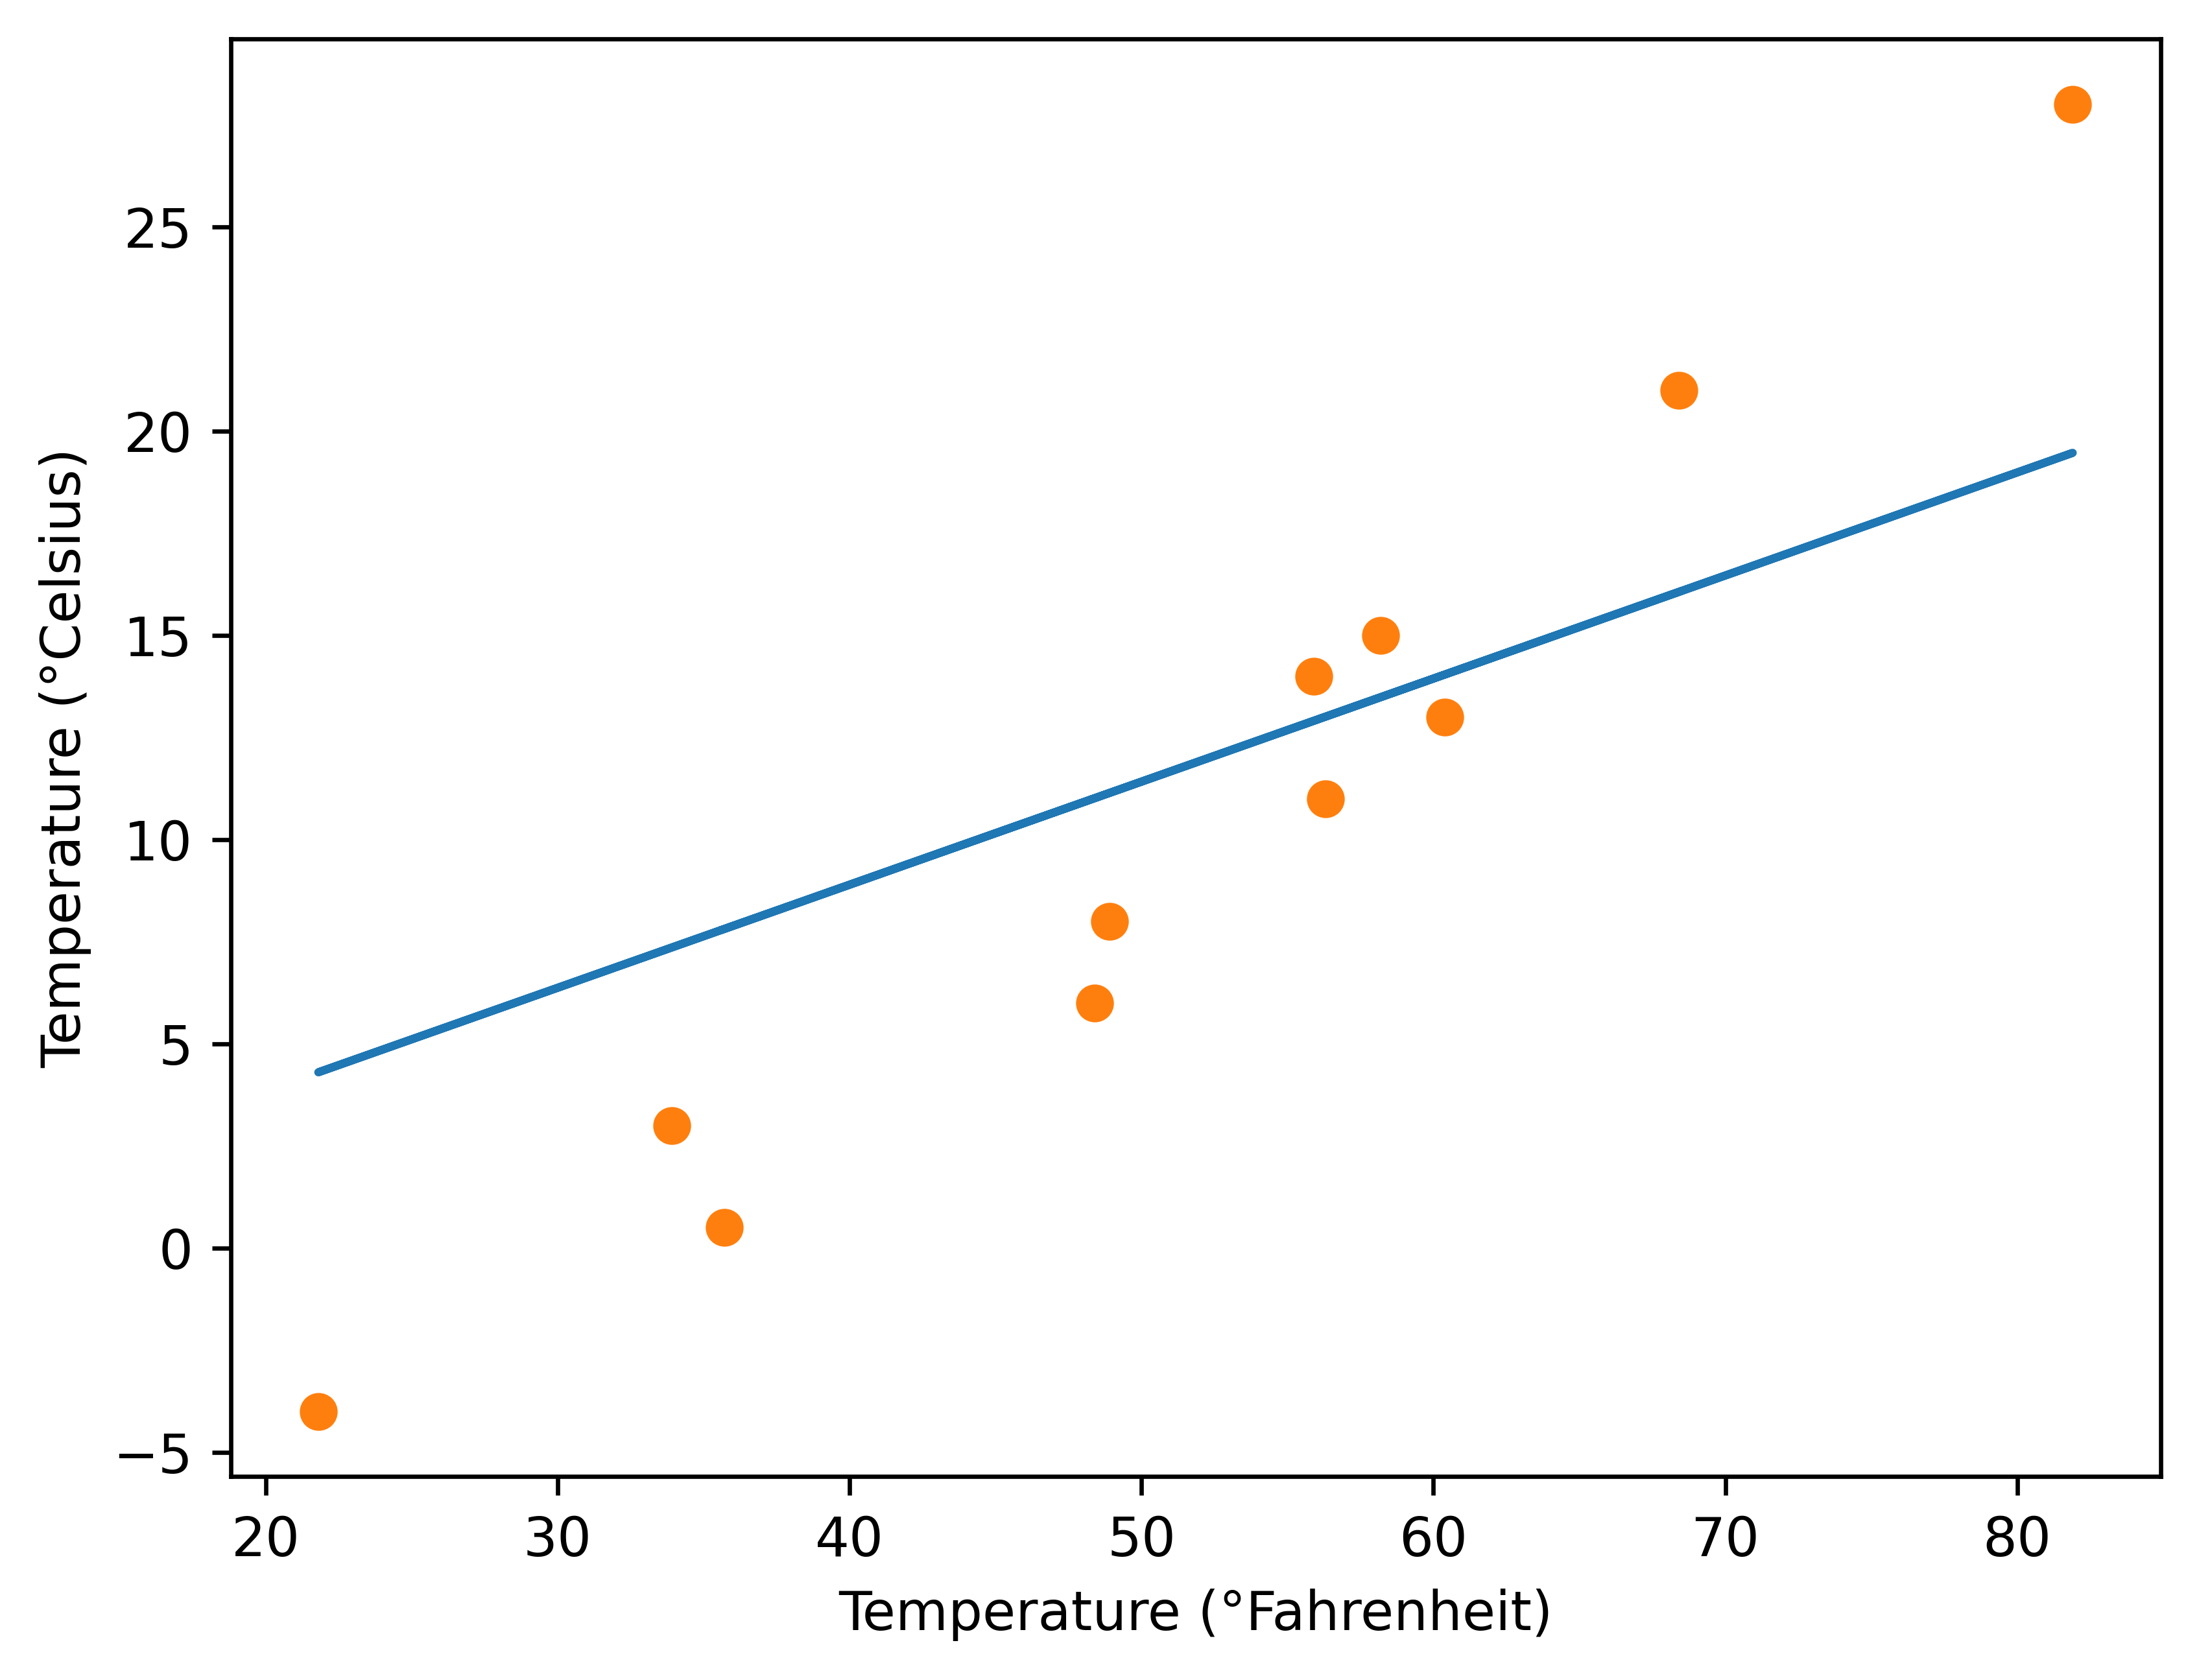

In [22]:
%matplotlib inline
from matplotlib import pyplot as plt

t_p = model(t_un, *params)

fig = plt.figure(dpi=600)
plt.xlabel("Temperature (°Fahrenheit)")
plt.ylabel("Temperature (°Celsius)")
plt.plot(t_u.numpy(), t_p.detach().numpy())
plt.plot(t_u.numpy(), t_c.numpy(), 'o')